<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/AgrupamentoCancerMama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de Agrupamento**
* Aprendizado não supervisionado
* Arranjo de instâncias em grupos com base em similaridade
  * similaridade entre vetores de atributos
* Objetivo do agrupamento é criar grupos coesos
  * maior similaridade entre instâncias de um mesmo grupo
  * maior dissimilaridade entre instâncias em grupos diferentes
* Dataset de câncer de mama
  * Dataset com atributos de nódulos identificados em imagens digitais de exames de mama.
  * Dados descrevem características do núcleo celular presentes na imagem e o diagnóstico associado (maligno ou benigno).
  * [Breast Cancer Wiscosing Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


Montando ambiente no Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **1. Importando bibliotecas necessárias**

In [4]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## **2. Lendo dados**

In [5]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana4/datasets/cancer/breast_cancer.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **3. Organização dos dados**

In [6]:
#excluir colunas irrelevantes
dados = dados.drop(columns=['id'])

In [7]:
#trocando o tipo do atributo diagnostico por um tipo numerico
dados['diagnosis'] = dados['diagnosis'].replace(['M','B'],[1,0])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **4. Re-escala dos dados**

In [8]:
#re-escala dos dados
dados = (dados - dados.min())/(dados.max()-dados.min())

## **5. Organizando dados para modelagem**

In [9]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [10]:
y = dados.diagnosis
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: diagnosis, dtype: float64

## **6. Definindo o algoritmo de agrumento**

### Criando o modelo e ajustando aos dados

In [11]:
#agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Aplicando o modelo aos dados de teste

In [12]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Visualizando os resultados do agrupamento

In [13]:
X = X.reset_index(drop=True)

In [14]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'diagnosis',grupos)

In [15]:
benigno = X[X['diagnosis']==0]
maligno = X[X['diagnosis']==1]

In [16]:
plt.rcParams["figure.figsize"] = (8,5)

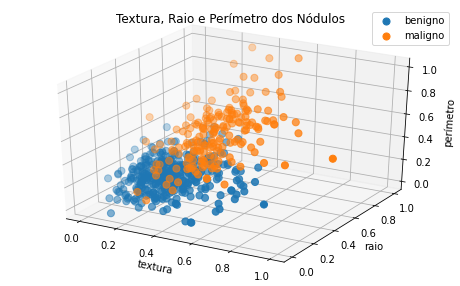

In [17]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(benigno.texture_mean,benigno.radius_mean,benigno.perimeter_mean,s=50,label='benigno')
ax.scatter3D(maligno.texture_mean,maligno.radius_mean,maligno.perimeter_mean,s=50,label='maligno')
plt.legend()
ax.set_xlabel('textura')
ax.set_ylabel('raio')
ax.set_zlabel('perímetro')
plt.title('Textura, Raio e Perímetro dos Nódulos')
plt.show()


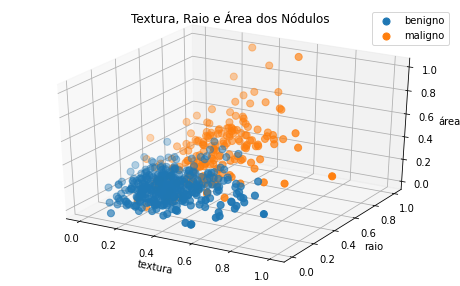

In [18]:
ax = plt.axes(projection='3d')
ax.scatter3D(benigno.texture_mean,benigno.radius_mean,benigno.area_mean,s=50,label='benigno')
ax.scatter3D(maligno.texture_mean,maligno.radius_mean,maligno.area_mean,s=50,label='maligno')
plt.legend()
ax.set_xlabel('textura')
ax.set_ylabel('raio')
ax.set_zlabel('área')
plt.title('Textura, Raio e Área dos Nódulos')
plt.show()


In [19]:
plt.rcParams["figure.figsize"] = (25,20)

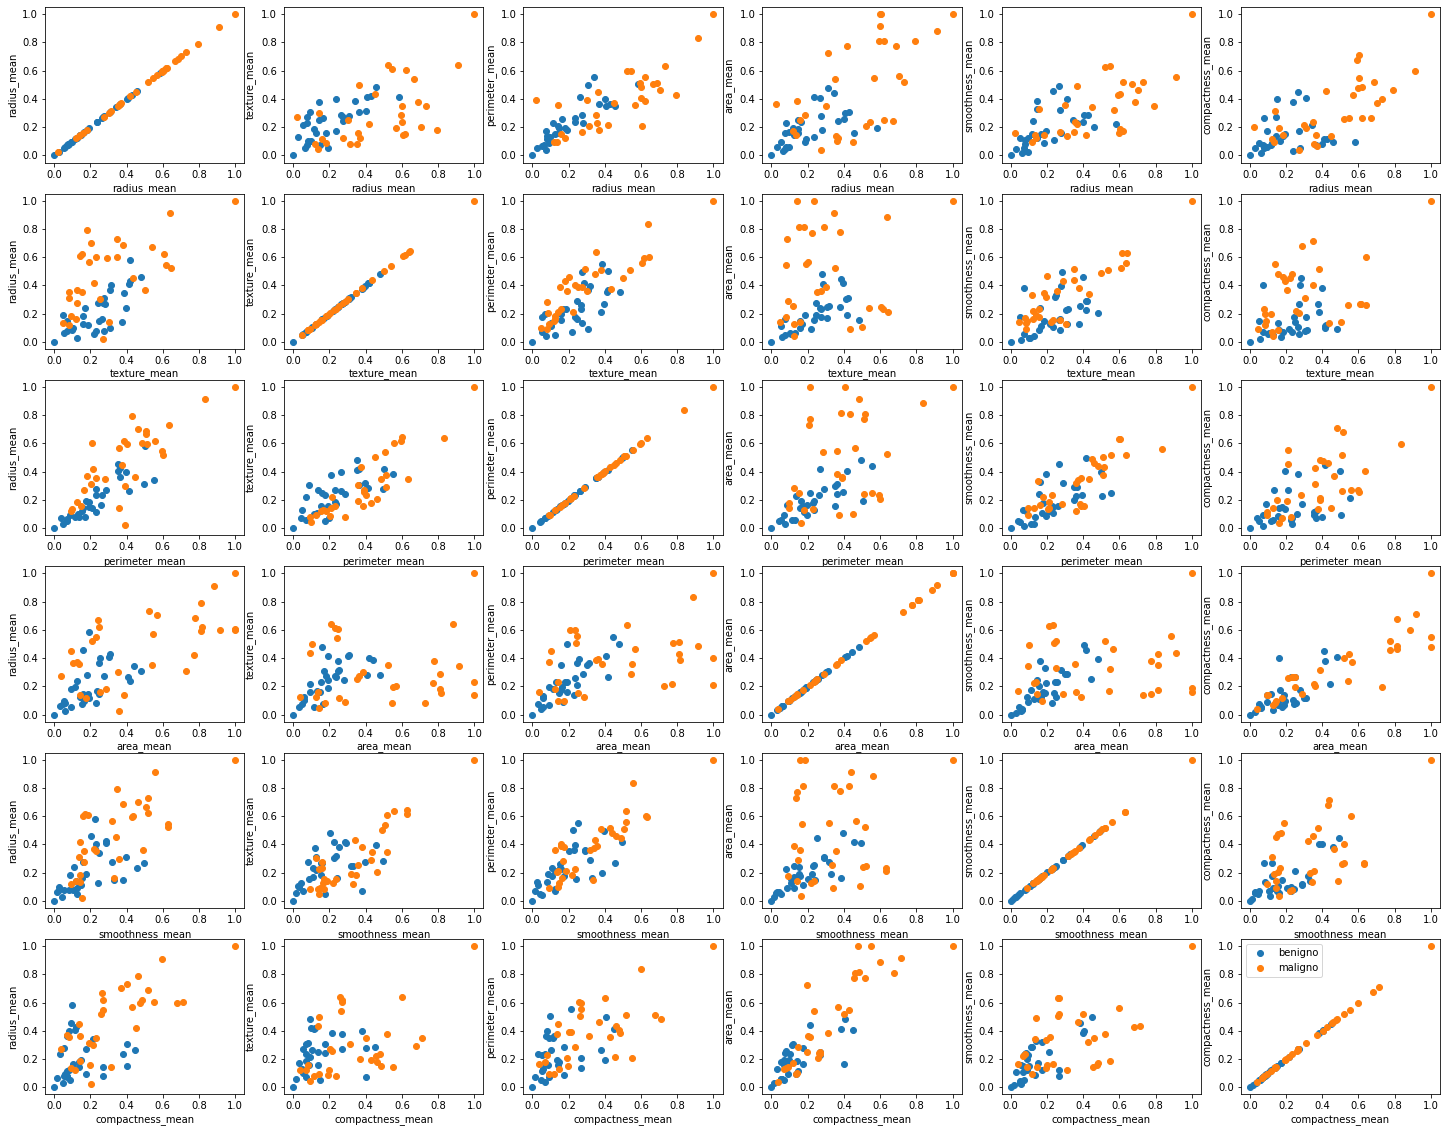

In [20]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(benigno.iloc[i],benigno.iloc[j],label='benigno')
    axs[i,j].scatter(maligno.iloc[i],maligno.iloc[j],label='maligno')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

## 7. **Avaliando o modelo**
* Existem duas formas de avaliar o modelo
  * quando as labels estão disponíveis
  * quando as labels não estão disponíveis (mundo real)
* Quando as labels estão disponíveis
  * usamos métricas que comparam labels com os grupos formados
  * um bom modelo agrupa instâncias de mesma classe
* Quando as labels não estão disponíveis
  * usamos métodos que medem a similaridade intra-grupo e dissimilaridade entre instâncias de grupos diferentes


### Métricas para quando se conhecem as classes

#### Acurácia
* similar a métrica de classificação
* não muito utilizada na prática
* os grupos formados não são necessariamente correspondentes as classes

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.928

#### Índice Rand Ajustado
* Mede a similaridade de duas atribuições, ignorando permutações
  * ignora se as classes são 0,1,2 e 2,1,0, por exemplo
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando negativo ou próximo de 0

In [23]:
from sklearn.metrics import adjusted_rand_score

In [24]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

0.7301749027614344

### Scores baseados em informação mútua
* Mede a concordância entre duas atribuções, ignorando permutações
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando negativo ou próximo de 0

In [25]:
from sklearn.metrics import adjusted_mutual_info_score

In [26]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

0.6225724776699426

### Fowlkes-Mallows scores
* Calculado como a média geométrica de precisão e recall
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando próximo de 0

In [27]:
from sklearn.metrics import fowlkes_mallows_score

In [28]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.8769937007196967

## Métricas quando as classes não são conhecidas

### Índice Davies-Boldin
* Índice indica uma smiliaridade média entre os grupos
* Essa similaridade é a comparação da distância entre os grupos levando em consideração o tamanho dos grupos
* Quanto maior o valor, melhor
* 0 é o pior resultado

In [29]:
#excluindo a coluna diagnóstico
X = X.drop(columns=['diagnosis'])

In [30]:
from sklearn.metrics import davies_bouldin_score

In [31]:
db = davies_bouldin_score(X,kmeans_labels)
db

1.1363352910881965

### Coeficiente de Silhueta
* Considera:
  * a distância média entre uma instância e todas as instâncias no mesmo grupo
  * a distância média entre uma instância e todas as instâncias no grupo mais próximo
* Quanto maior o valor, melhor
* 0 é o pior resultado

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.3845494883485513

### Índice Calinski-Harabasz 
* Também conhecido como critério da taxa de variância
* Mede a dispersão entre grupos e intra-grupos para todos os grupos
  * a dispersão é a soma das distâncias quadradas
* Quanto maior o valor, melhor


In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ch = calinski_harabasz_score(X,kmeans_labels)
ch

364.0930516256971

## **Agrupamento Hierárquico**

### Agrupamento Hierárquico Aglomerativo
* Cria-se os grupos a partir das folhas
* Cada grupo inicialmente contem uma instância

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png width=220>

* A cada iteração, grupos menores que estão mais próximos são agrupados até que haja apenas um grupo

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-31-06.png width=300>

* Cada iteração representa a criação de um novo nível hierárquico

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-10-06.png width=300>

* Em seguida, podemos definir um limiar de distância de desenhar uma linha horizontal no dendograma
  * o número de linhas verticais que o limiar cortar, será o número de grupos utilizados

  <img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-12-55.png width=300>


In [36]:
from sklearn.cluster import AgglomerativeClustering

### Definindo modelo e realizando o agrupamento

In [37]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [38]:
labels_hierarquico

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Avaliando o modelo

In [39]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.132

In [40]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

0.5383388964592651

In [41]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.41617198440906894

In [42]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.7888160538924622

In [43]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.2301928759265672

In [44]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.36706054267114924

In [45]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

319.01794931835724